# Estimate the gender of a song based on some intrinsic attribues

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
Last update: October, 2022

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pd.options.display.max_columns = 100

### Reading the dataset

In [3]:
music_df = pd.read_csv('./data/msd_genre_dataset.txt')

In [4]:
music_df.shape

(59600, 34)

In [5]:
music_df.dtypes

genre              object
track_id           object
artist_name        object
title              object
loudness          float64
tempo             float64
time_signature      int64
key                 int64
mode                int64
duration          float64
avg_timbre1       float64
avg_timbre2       float64
avg_timbre3       float64
avg_timbre4       float64
avg_timbre5       float64
avg_timbre6       float64
avg_timbre7       float64
avg_timbre8       float64
avg_timbre9       float64
avg_timbre10      float64
avg_timbre11      float64
avg_timbre12      float64
var_timbre1       float64
var_timbre2       float64
var_timbre3       float64
var_timbre4       float64
var_timbre5       float64
var_timbre6       float64
var_timbre7       float64
var_timbre8       float64
var_timbre9       float64
var_timbre10      float64
var_timbre11      float64
var_timbre12      float64
dtype: object

In [6]:
music_df.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


In [7]:
music_df['genre'].value_counts(normalize = True)

classic pop and rock     0.400923
folk                     0.221342
dance and electronica    0.082802
jazz and blues           0.072718
soul and reggae          0.067383
punk                     0.053691
metal                    0.035285
classical                0.031443
pop                      0.027131
hip-hop                  0.007282
Name: genre, dtype: float64

In [8]:
genres = ['jazz and blues', 'soul and reggae']
music_df_filter = music_df.loc[music_df['genre'].isin(genres)]

In [9]:
music_df_filter.shape

(8350, 34)

In [10]:
music_df_filter.loc[music_df_filter['genre'] == 'jazz and blues', 'genre'] = 0
music_df_filter.loc[music_df_filter['genre'] == 'soul and reggae', 'genre'] = 1

In [11]:
music_df_filter['genre'].value_counts(normalize = True)

0    0.519042
1    0.480958
Name: genre, dtype: float64

### Splitting train and test datasets

In [12]:
X = music_df_filter[music_df_filter.columns.tolist()[4:]]

In [13]:
Y = music_df_filter['genre']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)

In [15]:
pd.Series(Y_train).value_counts(normalize = True)

0    0.519076
1    0.480924
Name: genre, dtype: float64

In [16]:
pd.Series(Y_test).value_counts(normalize = True)

0    0.518962
1    0.481038
Name: genre, dtype: float64

### Preprocessing feature matrix

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

### Training a Logistic Regression model

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train, Y_train.astype(int))

LogisticRegression()

In [36]:
logmodel_predictions = logmodel.predict(X_test)

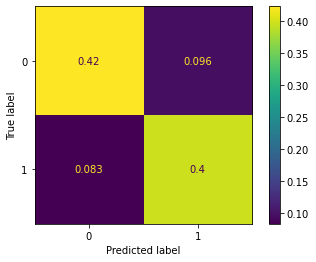

In [38]:
ConfusionMatrixDisplay.from_predictions(Y_test.astype(int), logmodel_predictions, normalize = 'all')

In [39]:
print('Precision:', precision_score(Y_test.astype(int), logmodel_predictions))
print('Recall:', recall_score(Y_test.astype(int), logmodel_predictions))
print('F1:', f1_score(Y_test.astype(int), logmodel_predictions))

Precision: 0.8058252427184466
Recall: 0.8265560165975103
F1: 0.8160589922163047


### Training a Neural Networks model

In [40]:
neuralmodel = MLPClassifier()

In [41]:
neuralmodel.fit(X_train, Y_train.astype(int))

/Users/fabiapena/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [42]:
neuralmodel_predictions = neuralmodel.predict(X_test)

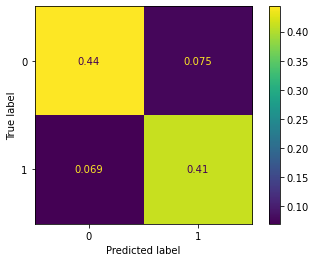

In [44]:
ConfusionMatrixDisplay.from_predictions(Y_test.astype(int), neuralmodel_predictions, normalize = 'all')

In [45]:
print('Precision:', precision_score(Y_test.astype(int), neuralmodel_predictions))
print('Recall:', recall_score(Y_test.astype(int), neuralmodel_predictions))
print('F1:', f1_score(Y_test.astype(int), neuralmodel_predictions))

Precision: 0.8452088452088452
Recall: 0.8564315352697095
F1: 0.8507831821929102


### Training a Support Vector Machines model

In [46]:
svmmodel = SVC()

In [47]:
svmmodel.fit(X_train,Y_train.astype(int))

SVC()

In [48]:
svmmodel_predictions = svmmodel.predict(X_test)

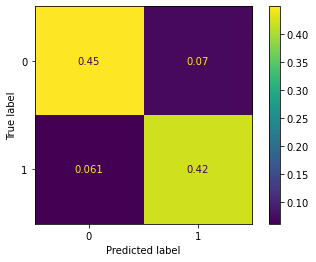

In [49]:
ConfusionMatrixDisplay.from_predictions(Y_test.astype(int), svmmodel_predictions, normalize = 'all')

In [50]:
print('Precision:', precision_score(Y_test.astype(int), svmmodel_predictions))
print('Recall:', recall_score(Y_test.astype(int), svmmodel_predictions))
print('F1:', f1_score(Y_test.astype(int), svmmodel_predictions))

Precision: 0.8566775244299675
Recall: 0.8730290456431535
F1: 0.8647759967118784
